In [1]:
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 90% !important; }</style>"))

import sys
sys.path.append('../utils')
        
import tensorflow as tf
import hdf5_experiment as E
import sacred
import matplotlib.pyplot as plt

tf.__version__

'2.1.0'

<KeysViewHDF5 ['actions', 'checkpoints', 'observations', 'rewards', 'track', 'track_len']>


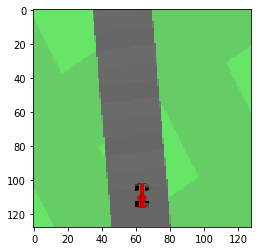

In [2]:
print(E.HD.keys())

im = E.OBSERVATIONS[0, 900]
plt.imshow(im / 255)

In [3]:
E.EX.add_config(
    SEQ_LEN = 128,
    W = 64,
    H = 64,
    internal_size = 64,
    epochs = 1000,
    batch_size = 4,
    steps_per_epoch = 200,
    lr = 0.001,
    weight_decay = 0.0001,
    should_preload_model = True,
)

E.EX.observers.append(sacred.observers.MongoObserver())

INFO - DRNN Car Racing 4 (scaled renderer) - Running command 'main'
INFO - DRNN Car Racing 4 (scaled renderer) - Started run with ID "95"


(None, None, 64, 64, 3)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
condition (InputLayer)          [(None, 12, 2)]      0                                            
__________________________________________________________________________________________________
action (InputLayer)             [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
initializer (Sequential)        (None, 64)           3504        condition[0][0]                  
__________________________________________________________________________________________________
memory (Model)                  (None, None, 64)     63936       action[0][0]                     
                                                                 initi

WARNING - tensorflow - From ../utils/hdf5_experiment.py:110: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


Train for 200 steps, validate for 2 steps
Added image/png as content-type of artifact /home/izpc/workspace/differentiable-simulation/notebooks/pred_rollout_2.png.


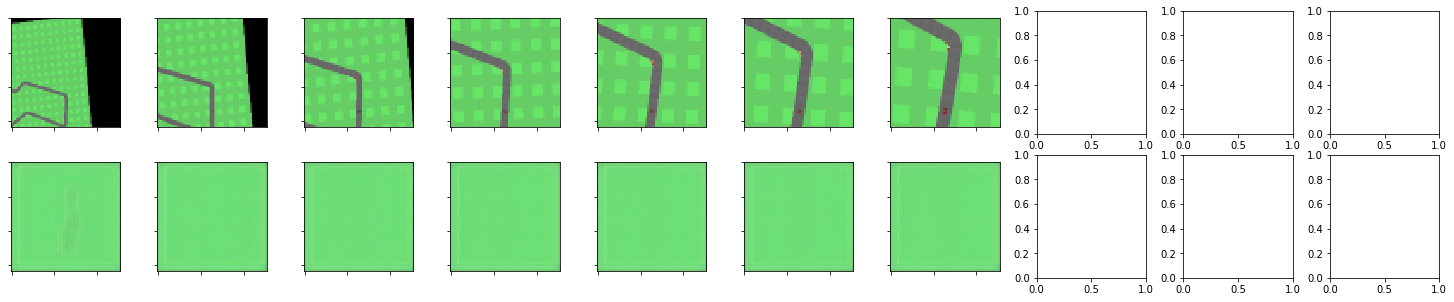

Epoch 1/50
  8/200 [>.............................] - ETA: 3:50 - loss: 2.2017 - renderer_loss: 0.6066 - reward_loss: 1.5951

In [ ]:
E.EX.run(config_updates={'SEQ_LEN': 32, 'batch_size': 8, 'epochs': 50})
print('>>>>>>>>>>>>>>\n\n\n')

E.EX.run(config_updates={'SEQ_LEN': 64, 'batch_size': 4, 'epochs': 30})
print('>>>>>>>>>>>>>>\n\n\n')

E.EX.run(config_updates={'SEQ_LEN': 128, 'batch_size': 2, 'epochs': 30})
print('>>>>>>>>>>>>>>\n\n\n')

E.EX.run(config_updates={'SEQ_LEN': 256, 'batch_size': 1, 'epochs': 1000})
print('>>>>>>>>>>>>>>\n\n\n')

---

In [ ]:
import numpy as np
import h5py
from visualization import to_video

model = E.MODEL
example_id = 2
seq_len = 512

hd = h5py.File('../../DQN/car_racing_val.hdf5', 'r')
actions = hd['actions'][example_id, :seq_len][np.newaxis, ...]
checkpoint = hd['checkpoints'][example_id, :seq_len][np.newaxis, ...]
observations = hd['observations'][example_id, :seq_len]
pred_obs = model.net.predict([checkpoint, actions])[0][0]

video_name='./car_val.avi'
to_video([pred_obs, observations], video_name)

In [ ]:
t = tf.random.uniform((1, 12, 12, 1))

tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(2, (2, 2), strides=(1, 1)),
    tf.keras.layers.Conv2DTranspose(2, (2, 2), strides=(2, 2)),
    tf.keras.layers.Conv2DTranspose(2, (3, 3), strides=(1, 1)),
    tf.keras.layers.Conv2DTranspose(2, (3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2DTranspose(2, (4, 4), strides=(1, 1)),
    tf.keras.layers.Conv2DTranspose(2, (4, 4), strides=(1, 1)),
])(t).shape